<a href="https://colab.research.google.com/github/royam0820/unsloth/blob/main/amr_Qwen2_5_(3B)_GRPO_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Unsloth
**Unsloth** is an open-source platform designed to accelerate the fine-tuning and training of large language models (LLMs) such as Llama 3, Phi 3.5, and Mistral. It offers a user-friendly interface that enables developers and researchers to fine-tune these models more efficiently.

✅ Unsloth → Best for fast LoRA fine-tuning & quantized LLaMA-based models.

To run this, press "*Runtime*" and press "*Run all*" on a **free** Tesla T4 Google Colab instance!
<div class="align-center">
<a href="https://unsloth.ai/"><img src="https://github.com/unslothai/unsloth/raw/main/images/unsloth%20new%20logo.png" width="115"></a>
<a href="https://discord.gg/unsloth"><img src="https://github.com/unslothai/unsloth/raw/main/images/Discord button.png" width="145"></a>
<a href="https://docs.unsloth.ai/"><img src="https://github.com/unslothai/unsloth/blob/main/images/documentation%20green%20button.png?raw=true" width="125"></a></a> Join Discord if you need help + ⭐ <i>Star us on <a href="https://github.com/unslothai/unsloth">Github</a> </i> ⭐
</div>

To install Unsloth on your own computer, follow the installation instructions on our Github page [here](https://docs.unsloth.ai/get-started/installing-+-updating).

You will learn how to do [data prep](#Data), how to [train](#Train), how to [run the model](#Inference), & [how to save it](#Save)

Visit our docs for all our [model uploads](https://docs.unsloth.ai/get-started/all-our-models) and [notebooks](https://docs.unsloth.ai/get-started/unsloth-notebooks).


### News

**Read our [blog post](https://unsloth.ai/blog/r1-reasoning) for guidance to train reasoning model.** GRPO notebook is inspired by [@shxf0072](https://x.com/shxf0072/status/1886085377146180091), [@Teknium1](https://x.com/Teknium1/status/1885077369142337550), [@willccbb](https://gist.github.com/willccbb/4676755236bb08cab5f4e54a0475d6fb)

Visit our docs for all our [model uploads](https://docs.unsloth.ai/get-started/all-our-models) and [notebooks](https://docs.unsloth.ai/get-started/unsloth-notebooks).


### Installation

In [ ]:
%%capture
# Skip restarting message in Colab
import sys; modules = list(sys.modules.keys())
for x in modules: sys.modules.pop(x) if "PIL" in x or "google" in x else None

!pip install unsloth vllm
#!pip install --upgrade pillow
# If you are running this notebook on local, you need to install `diffusers` too
# !pip install diffusers
# Temporarily install a specific TRL nightly version
!pip install git+https://github.com/huggingface/trl.git@e95f9fb74a3c3647b86f251b7e230ec51c64b72b

NB:
- `%%capture` suppresses the output of the cell
- `modules = list(sys.modules.keys()) `to check which modules are currently loaded.
- HugginfFace TRL: Hugging Face TRL (Transformer Reinforcement Learning) is a library designed for fine-tuning and training Large Language Models (LLMs) using Reinforcement Learning (RL), particularly Reinforcement,Learning from Human Feedback (RLHF), it has now be updated for GRPO.
- vLLM (Very Large Language Model Inference and Serving) is an optimized inference engine designed for serving large language models (LLMs) efficiently. It provides faster inference, lower memory usage, and better scalability compared to traditional PyTorch-based inference.

Restart the runtime

### Unsloth

Use `PatchFastRL` before all functions to patch GRPO and other RL algorithms!

In [ ]:
from unsloth import FastLanguageModel, PatchFastRL
PatchFastRL("GRPO", FastLanguageModel)

Unsloth: Patching Xformers to fix some performance issues.
🦥 Unsloth: Will patch your computer to enable 2x faster free finetuning.
🦥 Unsloth Zoo will now patch everything to make training faster!
INFO 02-12 09:01:35 __init__.py:190] Automatically detected platform cuda.


NB: The line `from unsloth import FastLanguageModel, PatchFastRL` is used in the Unsloth library to import two key components:

**FastLanguageModel**: This class is designed to efficiently load and handle large language models, optimizing for both speed and memory usage.

**PatchFastRL**: This function applies specific patches to the training environment to enhance the performance of reinforcement learning algorithms, such as GRPO (Group Relative Policy Optimization) and PPO (Proximal Policy Optimization).

Load up `Qwen 2.5 3B Instruct`, and set parameters

In [ ]:
from unsloth import is_bfloat16_supported
import torch
max_seq_length = 1024 # Can increase for longer reasoning traces
lora_rank = 64 # Larger rank = smarter, but slower

model, tokenizer = FastLanguageModel.from_pretrained(
    model_name = "Qwen/Qwen2.5-3B-Instruct",
    max_seq_length = max_seq_length,
    load_in_4bit = True, # False for LoRA 16bit
    fast_inference = True, # Enable vLLM fast inference
    max_lora_rank = lora_rank,
    gpu_memory_utilization = 0.5, # Reduce if out of memory
)

model = FastLanguageModel.get_peft_model(
    model,
    r = lora_rank, # Choose any number > 0 ! Suggested 8, 16, 32, 64, 128
    target_modules = [
        "q_proj", "k_proj", "v_proj", "o_proj",
        "gate_proj", "up_proj", "down_proj",
    ], # Remove QKVO if out of memory
    lora_alpha = lora_rank,
    use_gradient_checkpointing = "unsloth", # Enable long context finetuning
    random_state = 3407,
)

==((====))==  Unsloth 2025.2.5: Fast Qwen2 patching. Transformers: 4.48.2.
   \\   /|    GPU: Tesla T4. Max memory: 14.741 GB. Platform: Linux.
O^O/ \_/ \    Torch: 2.5.1+cu124. CUDA: 7.5. CUDA Toolkit: 12.4. Triton: 3.1.0
\        /    Bfloat16 = FALSE. FA [Xformers = 0.0.28.post3. FA2 = False]
 "-____-"     Free Apache license: http://github.com/unslothai/unsloth
Unsloth: Fast downloading is enabled - ignore downloading bars which are red colored!
Unsloth: vLLM loading unsloth/qwen2.5-3b-instruct-unsloth-bnb-4bit with actual GPU utilization = 49.66%
Unsloth: Your GPU has CUDA compute capability 7.5 with VRAM = 14.74 GB.
Unsloth: Using conservativeness = 1.0. Chunked prefill tokens = 1024. Num Sequences = 192.
Unsloth: vLLM's KV Cache can use up to 4.9 GB. Also swap space = 2 GB.
WARNING 02-12 09:01:43 config.py:2386] Casting torch.bfloat16 to torch.float16.
INFO 02-12 09:02:07 config.py:542] This model supports multiple tasks: {'reward', 'classify', 'score', 'embed', 'generate'}. Def

tokenizer_config.json:   0%|          | 0.00/7.36k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/2.78M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/1.67M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/11.4M [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/605 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/614 [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/271 [00:00<?, ?B/s]

INFO 02-12 09:02:12 cuda.py:179] Cannot use FlashAttention-2 backend for Volta and Turing GPUs.
INFO 02-12 09:02:12 cuda.py:227] Using XFormers backend.
INFO 02-12 09:02:13 model_runner.py:1110] Starting to load model unsloth/qwen2.5-3b-instruct-unsloth-bnb-4bit...
INFO 02-12 09:02:14 loader.py:1102] Loading weights with BitsAndBytes quantization.  May take a while ...
INFO 02-12 09:02:14 weight_utils.py:252] Using model weights format ['*.safetensors']


model.safetensors:   0%|          | 0.00/2.36G [00:00<?, ?B/s]

Loading safetensors checkpoint shards:   0% Completed | 0/1 [00:00<?, ?it/s]


Loading safetensors checkpoint shards:   0% Completed | 0/1 [00:00<?, ?it/s]


INFO 02-12 09:02:42 model_runner.py:1115] Loading model weights took 2.2160 GB
INFO 02-12 09:02:42 punica_selector.py:18] Using PunicaWrapperGPU.
INFO 02-12 09:02:51 worker.py:267] Memory profiling takes 8.87 seconds
INFO 02-12 09:02:51 worker.py:267] the current vLLM instance can use total_gpu_memory (14.74GiB) x gpu_memory_utilization (0.50) = 7.32GiB
INFO 02-12 09:02:51 worker.py:267] model weights take 2.22GiB; non_torch_memory takes 0.05GiB; PyTorch activation peak memory takes 1.05GiB; the rest of the memory reserved for KV Cache is 4.01GiB.
INFO 02-12 09:02:52 executor_base.py:110] # CUDA blocks: 7300, # CPU blocks: 3640
INFO 02-12 09:02:52 executor_base.py:115] Maximum concurrency for 1024 tokens per request: 114.06x
INFO 02-12 09:02:54 model_runner.py:1434] Capturing cudagraphs for decoding. This may lead to unexpected consequences if the model is not static. To run the model in eager mode, set 'enforce_eager=True' or use '--enforce-eager' in the CLI. If out-of-memory error oc

Capturing CUDA graph shapes: 100%|██████████| 27/27 [00:40<00:00,  1.51s/it]

INFO 02-12 09:03:34 model_runner.py:1562] Graph capturing finished in 41 secs, took 0.62 GiB
INFO 02-12 09:03:34 llm_engine.py:431] init engine (profile, create kv cache, warmup model) took 52.61 seconds


tokenizer_config.json:   0%|          | 0.00/7.36k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/2.78M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/1.67M [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/605 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/614 [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/11.4M [00:00<?, ?B/s]

Unsloth 2025.2.5 patched 36 layers with 36 QKV layers, 36 O layers and 36 MLP layers.


NB:
- `lora_rank=64` LoRA (Low-Rank Adaptation) modifies only a small part of a large model to fine-tune it efficiently. Instead of updating all parameters, it injects small, trainable matrices into the model’s layers.

- `load_in_4bit=True` is an optimization method that loads a model using 4-bit quantization, reducing memory usage and improving efficiency.

Key Benefits of This Setup:
- Efficient fine-tuning using LoRA (avoiding full model updates).
- Memory optimization via use_gradient_checkpointing.
- Flexibility (adjust r and target_modules based on available VRAM).
- Fast inference thanks to Unsloth’s optimizations.


# Model Info

In [ ]:
model

PeftModelForCausalLM(
  (base_model): LoraModel(
    (model): Qwen2ForCausalLM(
      (model): Qwen2Model(
        (embed_tokens): Embedding(151936, 2048, padding_idx=151654)
        (layers): ModuleList(
          (0-1): 2 x Qwen2DecoderLayer(
            (self_attn): Qwen2Attention(
              (q_proj): lora.Linear(
                (base_layer): Linear4bit(in_features=2048, out_features=2048, bias=True)
                (lora_dropout): ModuleDict(
                  (default): Identity()
                )
                (lora_A): ModuleDict(
                  (default): Linear(in_features=2048, out_features=64, bias=False)
                )
                (lora_B): ModuleDict(
                  (default): Linear(in_features=64, out_features=2048, bias=False)
                )
                (lora_embedding_A): ParameterDict()
                (lora_embedding_B): ParameterDict()
                (lora_magnitude_vector): ModuleDict()
              )
              (k_proj): lora.Linea

NB1: This model `Base Model: Qwen2ForCausalLM` is a `Qwen2-based Transformer model` for causal language modeling that has been fine-tuned using PEFT (**Parameter-Efficient Fine-Tuning**) with LoRA (**Low-Rank Adaptation**). It is an auto-regressive model, it generates text, one token at at time.

NB2: **Key Features and Takeaways**

- Based on Qwen2 (optimized for large-scale language generation).
- LoRA fine-tuning enables efficient adaptation to new tasks.
- 4-bit quantization reduces model size and speeds up inference.
- Rotary embeddings improve positional understanding without using fixed embeddings.
- Causal Decoder-only architecture ensures it generates text sequentially.

### Data Prep
<a name="Data"></a>

We directly leverage [@willccbb](https://gist.github.com/willccbb/4676755236bb08cab5f4e54a0475d6fb) for data prep and all reward functions. You are free to create your own!

In [ ]:
import re
from datasets import load_dataset, Dataset

# Load and prep dataset
SYSTEM_PROMPT = """
Respond in the following format:
<reasoning>
...
</reasoning>
<answer>
...
</answer>
"""

XML_COT_FORMAT = """\
<reasoning>
{reasoning}
</reasoning>
<answer>
{answer}
</answer>
"""

def extract_xml_answer(text: str) -> str:
    answer = text.split("<answer>")[-1]
    answer = answer.split("</answer>")[0]
    return answer.strip()

def extract_hash_answer(text: str) -> str | None:
    if "####" not in text:
        return None
    return text.split("####")[1].strip()

# uncomment middle messages for 1-shot prompting
def get_gsm8k_questions(split = "train") -> Dataset:
    data = load_dataset('openai/gsm8k', 'main')[split] # type: ignore
    data = data.map(lambda x: { # type: ignore
        'prompt': [
            {'role': 'system', 'content': SYSTEM_PROMPT},
            {'role': 'user', 'content': x['question']}
        ],
        'answer': extract_hash_answer(x['answer'])
    }) # type: ignore
    return data # type: ignore

dataset = get_gsm8k_questions()

# Reward functions
def correctness_reward_func(prompts, completions, answer, **kwargs) -> list[float]:
    responses = [completion[0]['content'] for completion in completions]
    q = prompts[0][-1]['content']
    extracted_responses = [extract_xml_answer(r) for r in responses]
    print('-'*20, f"Question:\n{q}", f"\nAnswer:\n{answer[0]}", f"\nResponse:\n{responses[0]}", f"\nExtracted:\n{extracted_responses[0]}")
    return [2.0 if r == a else 0.0 for r, a in zip(extracted_responses, answer)]

def int_reward_func(completions, **kwargs) -> list[float]:
    responses = [completion[0]['content'] for completion in completions]
    extracted_responses = [extract_xml_answer(r) for r in responses]
    return [0.5 if r.isdigit() else 0.0 for r in extracted_responses]

def strict_format_reward_func(completions, **kwargs) -> list[float]:
    """Reward function that checks if the completion has a specific format."""
    pattern = r"^<reasoning>\n.*?\n</reasoning>\n<answer>\n.*?\n</answer>\n$"
    responses = [completion[0]["content"] for completion in completions]
    matches = [re.match(pattern, r) for r in responses]
    return [0.5 if match else 0.0 for match in matches]

def soft_format_reward_func(completions, **kwargs) -> list[float]:
    """Reward function that checks if the completion has a specific format."""
    pattern = r"<reasoning>.*?</reasoning>\s*<answer>.*?</answer>"
    responses = [completion[0]["content"] for completion in completions]
    matches = [re.match(pattern, r) for r in responses]
    return [0.5 if match else 0.0 for match in matches]

def count_xml(text) -> float:
    count = 0.0
    if text.count("<reasoning>\n") == 1:
        count += 0.125
    if text.count("\n</reasoning>\n") == 1:
        count += 0.125
    if text.count("\n<answer>\n") == 1:
        count += 0.125
        count -= len(text.split("\n</answer>\n")[-1])*0.001
    if text.count("\n</answer>") == 1:
        count += 0.125
        count -= (len(text.split("\n</answer>")[-1]) - 1)*0.001
    return count

def xmlcount_reward_func(completions, **kwargs) -> list[float]:
    contents = [completion[0]["content"] for completion in completions]
    return [count_xml(c) for c in contents]

README.md:   0%|          | 0.00/7.94k [00:00<?, ?B/s]

train-00000-of-00001.parquet:   0%|          | 0.00/2.31M [00:00<?, ?B/s]

test-00000-of-00001.parquet:   0%|          | 0.00/419k [00:00<?, ?B/s]

Generating train split:   0%|          | 0/7473 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/1319 [00:00<?, ? examples/s]

Map:   0%|          | 0/7473 [00:00<?, ? examples/s]

NB:
These functions assign scores based on correctness, format adherence, and structure:

`correctness_reward_func`: Compares extracted answers with the ground truth. Returns 2.0 for correct answers, 0.0 otherwise.

`int_reward_func`: Rewards responses that contain a numeric answer. Score: 0.5 if answer is a digit, else 0.0.

`strict_format_reward_func`: Enforces a strict XML format.
Uses regex to check for exact structure.
Score: 0.5 for correct format, 0.0 otherwise.

`soft_format_reward_func`: Looser check for XML formatting.
Allows spacing variations. Score: 0.5 for approximate format, 0.0 otherwise.

`xmlcount_reward_func`: Counts XML elements (<reasoning>, <answer>) and assigns partial credit.
Deduces points for extra text after </answer>.

<a name="Train"></a>
### Train the model

Now set up GRPO Trainer and all configurations!

In [ ]:
from trl import GRPOConfig, GRPOTrainer
training_args = GRPOConfig(
    use_vllm = True, # use vLLM for fast inference!
    learning_rate = 5e-6,
    adam_beta1 = 0.9,
    adam_beta2 = 0.99,
    weight_decay = 0.1,
    warmup_ratio = 0.1,
    lr_scheduler_type = "cosine",
    optim = "adamw_8bit",
    logging_steps = 1,
    bf16 = is_bfloat16_supported(),
    fp16 = not is_bfloat16_supported(),
    per_device_train_batch_size = 1,
    gradient_accumulation_steps = 1, # Increase to 4 for smoother training
    num_generations = 8, # Decrease if out of memory (number of completions)
    max_prompt_length = 256,
    max_completion_length = 200,
    # num_train_epochs = 1, # Set to 1 for a full training run
    max_steps = 250,
    save_steps = 250,
    max_grad_norm = 0.1,
    report_to = "none", # Can use Weights & Biases
    output_dir = "outputs",
)

torch.distributed process group is initialized, but parallel_mode != ParallelMode.DISTRIBUTED. In order to use Torch DDP, launch your script with `python -m torch.distributed.launch


NB: **Configuration summary**:  
- ✅ Optimized for efficiency (8-bit AdamW, vLLM for fast inference).
- ✅ Memory-efficient (low batch size, gradient accumulation).
- ✅ Controlled fine-tuning (cosine LR, warmup, clipping).
- ✅ Designed for GRPO fine-tuning with reinforcement learning.



And let's run the trainer! If you scroll up, you'll see a table of rewards. The goal is to see the `reward` column increase!

You might have to wait 150 to 200 steps for any action. You'll probably get 0 reward for the first 100 steps. Please be patient!

| Step | Training Loss | reward    | reward_std | completion_length | kl       |
|------|---------------|-----------|------------|-------------------|----------|
| 1    | 0.000000      | 0.125000  | 0.000000   | 200.000000        | 0.000000 |
| 2    | 0.000000      | 0.072375  | 0.248112   | 200.000000        | 0.000000 |
| 3    | 0.000000      | -0.079000 | 0.163776   | 182.500000        | 0.000005 |


In [ ]:
trainer = GRPOTrainer(
    model = model,
    processing_class = tokenizer,
    reward_funcs = [
        xmlcount_reward_func,
        soft_format_reward_func,
        strict_format_reward_func,
        int_reward_func,
        correctness_reward_func,
    ],
    args = training_args,
    train_dataset = dataset,
)
trainer.train()

==((====))==  Unsloth - 2x faster free finetuning | Num GPUs = 1
   \\   /|    Num examples = 7,473 | Num Epochs = 1
O^O/ \_/ \    Batch size per device = 1 | Gradient Accumulation steps = 1
\        /    Total batch size = 1 | Total steps = 250
 "-____-"     Number of trainable parameters = 119,734,272


-------------------- Question:
Ahmed and Emily are having a contest to see who can get the best grade in the class. There have been 9 assignments and Ahmed has a 91 in the class. Emily has a 92. The final assignment is worth the same amount as all the other assignments. Emily got a 90 on the final assignment. What is the minimum grade Ahmed needs to get to beat Emily if all grades are whole numbers? 
Answer:
100 
Response:
<reasoning>
To determine the minimum grade Ahmed needs to beat Emily, we must first calculate the total points both Ahmed and Emily have earned so far, including the grades from the 9 assignments, and then consider Emily's potential score with her final grade, since the exact total points for the remaining assignments from Ahmed are not given.

Emily currently has 9 assignments with a total score of 92 points, and the final assignment she gets is 90 points. Therefore, her current total is:
\[ 9 \times 92 + 90 = 828 + 90 = 918 \]
She needs to find the minimum score to

Step,Training Loss,reward,reward_std,completion_length,kl
1,0.000000,0.125000,0.000000,200.000000,0.000000
2,0.000000,0.072375,0.248112,200.000000,0.000000
3,0.000000,-0.079000,0.163776,182.500000,0.000007
4,0.000000,0.125000,0.000000,200.000000,0.000005
5,0.000000,0.125000,0.000000,200.000000,0.000005
6,0.000000,0.059000,0.096743,174.125000,0.000007
7,0.000000,-0.101125,0.228568,172.750000,0.000010
8,0.000000,0.014250,0.149720,186.125000,0.000014
9,0.000000,0.032000,0.172894,184.125000,0.000012
10,0.000000,0.003875,0.141119,146.000000,0.000020


Streaming output truncated to the last 5000 lines.

The total nylon needed is the sum of the nylon needed for the dog collars and the cat collars.

\[
\text{Total nylon needed} = (9 \times 18) + (3 \times 10)
\]

</reasoning>
<answer>
\[
\text{Total nylon needed} = (9 \times 18) + (3 \times 10 
Extracted:
\[
\text{Total nylon needed} = (9 \times 18) + (3 \times 10
-------------------- Question:
Jonsey is awake for 2/3 of the day and spends 1/2 her time awake playing outside and the rest inside. Her brother, Riley, is awake for 3/4 of the day and spends 1/3 of his day outside and the rest inside. How much time, on average, do they spend inside? 
Answer:
10 
Response:
<reasoning>
To find out how much time Jonsey and Riley spend inside, let's break down the information given:

1. Jonsey's situation:
   - On average, Jonsey is awake for \( \frac{2}{3} \) of the day.
   - Out of the time she is awake, she spends \( \frac{1}{2} \) outside and the rest inside.
   - Therefore, the fraction of 

TrainOutput(global_step=250, training_loss=0.0017380567821032287, metrics={'train_runtime': 5781.7067, 'train_samples_per_second': 0.043, 'train_steps_per_second': 0.043, 'total_flos': 0.0, 'train_loss': 0.0017380567821032287})

NB1: **Training Summary**:
- ✅ Fine-tunes a model using GRPO & reinforcement learning
- ✅ Optimizes structured text generation (e.g., XML-formatted answers)
- ✅ Uses reward functions to guide model behavior
- ✅ Employs vLLM for fast inference and adamw_8bit for memory efficiency

NB2: **Before Training (Dataset Verification)**
Sample a few questions from the dataset before training to check:
- The question formatting.
- The correct extraction of answers.
- That the prompt and answer fields are structured correctly.
- This ensures that the model gets properly formatted inputs.

NB3: **After Training (Model's Generated Responses)**
- The trained model is tested with questions from the dataset.
- It produces responses based on its reasoning training.
- The output should follow the structured XML format with:

```
<reasoning>
...
</reasoning>
<answer>
...
</answer>

```
- We extract and compare the generated answer against the expected answer.

✅ Steps:
- Check if the model's reasoning is logical.
- Verify if the extracted answer matches the ground truth.
- Debug if answers are truncated or incorrectly formatted.







NB4: **Training Summary**
- 🔹 Before training → Sample dataset questions to confirm correct formatting.
- 🔹 After training → Model generates answers based on learned reasoning.
- 🔹 Goal → Ensure structured responses & accurate answers.




<a name="Inference"></a>
### Inference
For inference, we use vLLM for fast inference using a LoRA-adapted model.

Now let's try the model we just trained! First, let's first try the model without any GRPO trained:

In [ ]:
text = tokenizer.apply_chat_template([
    {"role" : "user", "content" : "Why the sky is blue"},
], tokenize = False, add_generation_prompt = True)    # Keeps the formatted prompt as raw text; Adds a system prompt cue for generation.

from vllm import SamplingParams
sampling_params = SamplingParams(
    temperature = 0.8,    # Introduces moderate randomness.
    top_p = 0.95,         # Limits token choices to top 95% of probability mass (helps avoid unlikely outputs).
    max_tokens = 1024,    # Ensures the response does not exceed 1024 tokens.
)
output = model.fast_generate(             # Optimized inference method in vLLM (faster than regular generation).
    [text],                               # Passes the formatted input
    sampling_params = sampling_params,    # Uses defined sampling settings
    lora_request = None,                  # No additional LoRA fine-tuning applied
)[0].outputs[0].text                      # Retrieves the model's generated text.

output

Processed prompts: 100%|██████████| 1/1 [00:05<00:00,  5.67s/it, est. speed input: 6.00 toks/s, output: 37.06 toks/s]


"The sky appears blue to our eyes because of a phenomenon called Rayleigh scattering. Here's a simple explanation of why the sky is blue:\n\n1. Sunlight is composed of many colors, each with a different wavelength.\n\n2. When sunlight enters Earth's atmosphere, it interacts with molecules in the air (primarily nitrogen and oxygen).\n\n3. Shorter wavelengths (like blue and violet) scatter more than longer wavelengths (like red and orange).\n\n4. These blue and violet wavelengths scatter in all directions.\n\n5. However, the human eye is more sensitive to blue light than violet.\n\n6. The blue light scatters in all directions from the sun.\n\n7. When you look at the sky, you're seeing all this blue light coming from all directions, mixed together to give the appearance of a blue sky.\n\nThis is why the sky is blue during the day. At sunrise and sunset, when the sunlight has to pass through more of the atmosphere, other colors may become more noticeable, which is why the sky often appears

NB: **Inference Summary**
- ✅ Uses vLLM for optimized fast inference.
- ✅ Applies chat formatting to the input.
- ✅ Uses efficient sampling for high-quality output.
- ✅ Retrieves and prints the generated response.

In [ ]:
text = tokenizer.apply_chat_template([
    {"role" : "user", "content" : "which number is higher 9.11 or 9.9"},
], tokenize = False, add_generation_prompt = True)

from vllm import SamplingParams
sampling_params = SamplingParams(
    temperature = 0.8,
    top_p = 0.95,
    max_tokens = 1024,
)
output = model.fast_generate(
    [text],
    sampling_params = sampling_params,
    lora_request = None,
)[0].outputs[0].text

output

Processed prompts: 100%|██████████| 1/1 [00:02<00:00,  2.81s/it, est. speed input: 15.33 toks/s, output: 36.36 toks/s]


'To compare the numbers 9.11 and 9.9, you can look at the digits from left to right:\n\n- Both numbers start with 9 in the ones place.\n- In the tenths place, 9.11 has a 1 and 9.9 has a 9.\n\nSince 1 is less than 9, 9.9 is greater than 9.11. Therefore, 9.9 is higher than 9.11.'

And now with the LoRA we just trained with GRPO - we first save the LoRA first!

In [ ]:
model.save_lora("grpo_saved_lora")

Now we load the LoRA and test:

In [ ]:
text = tokenizer.apply_chat_template([
    {"role" : "system", "content" : SYSTEM_PROMPT},
    {"role" : "user", "content" : "How many r's are in strawberry?"},
], tokenize = False, add_generation_prompt = True)

from vllm import SamplingParams
sampling_params = SamplingParams(
    temperature = 0.8,
    top_p = 0.95,
    max_tokens = 1024,
)
output = model.fast_generate(
    text,
    sampling_params = sampling_params,
    lora_request = model.load_lora("grpo_saved_lora"),
)[0].outputs[0].text

output

Processed prompts: 100%|██████████| 1/1 [00:03<00:00,  3.15s/it, est. speed input: 13.66 toks/s, output: 30.19 toks/s]


'<reasoning>\nTo determine how many r\'s are in the word "strawberry," we need to count each occurrence of the letter r in the word. The word "strawberry" contains the letter r in the following positions: 1st, 4th, 5th, and 10th. Therefore, there are 4 r\'s in the word "strawberry."\n</reasoning>\n<answer>4</answer>'

Our reasoning model is much better - it's not always correct, since we only trained it for an hour or so - it'll be better if we extend the sequence length and train for longer!



# Saving the files in the content directory


In [ ]:
import shutil

# Create a zip file of the /content directory
shutil.make_archive('/content/colab_backup', 'zip', '/content')

# Download the zip file
from google.colab import files
files.download('/content/colab_backup.zip')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Other savings

<a name="Save"></a>
### Saving to float16 for VLLM

We also support saving to `float16` directly. Select `merged_16bit` for float16 or `merged_4bit` for int4. We also allow `lora` adapters as a fallback. Use `push_to_hub_merged` to upload to your Hugging Face account! You can go to https://huggingface.co/settings/tokens for your personal tokens.

In [ ]:
# Merge to 16bit
if False: model.save_pretrained_merged("model", tokenizer, save_method = "merged_16bit",)
if False: model.push_to_hub_merged("hf/model", tokenizer, save_method = "merged_16bit", token = "")

# Merge to 4bit
if False: model.save_pretrained_merged("model", tokenizer, save_method = "merged_4bit",)
if False: model.push_to_hub_merged("hf/model", tokenizer, save_method = "merged_4bit", token = "")

# Just LoRA adapters
if False: model.save_pretrained_merged("model", tokenizer, save_method = "lora",)
if False: model.push_to_hub_merged("hf/model", tokenizer, save_method = "lora", token = "")

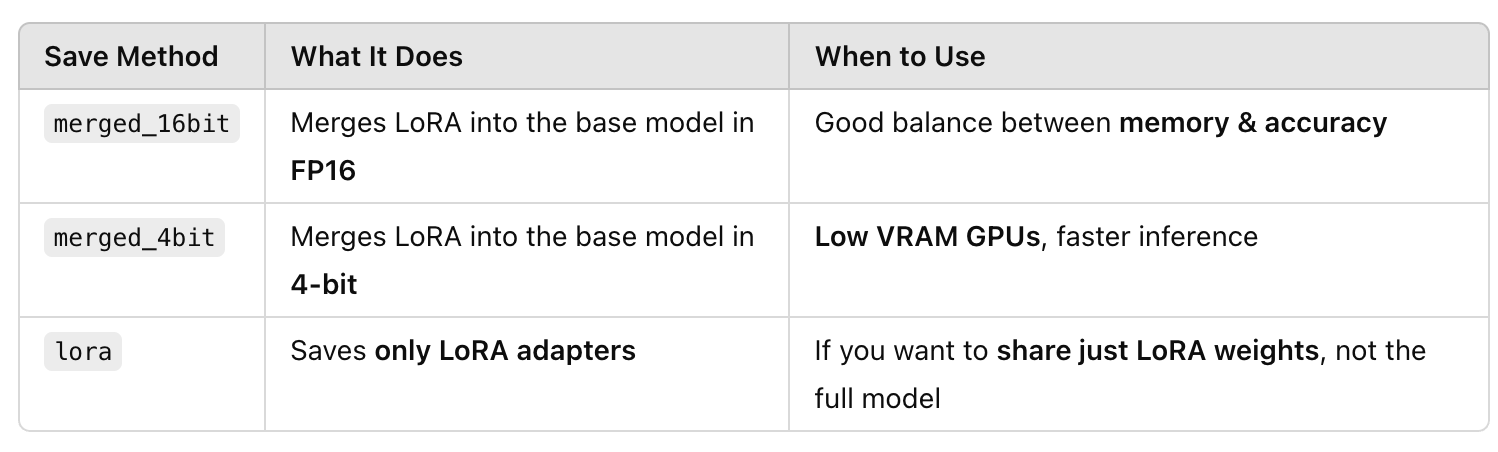

NB: **Key Takeaways**
- ✅ Allows flexible model saving in different formats (16-bit, 4-bit, LoRA-only).
- ✅ Optimized for different deployment scenarios (full precision, quantized, LoRA-only).
- ✅ Supports Hugging Face Hub uploads (push_to_hub_merged).

### GGUF (Grokking GPU Unified Format) / llama.cpp Conversion

- GGUF (Grokking GPU Unified Format) is a format used for models running in llama.cpp.
- llama.cpp is a lightweight inference engine for LLaMA models, optimized for CPUs and GPUs

To save to `GGUF` / `llama.cpp`, we support it natively now! We clone `llama.cpp` and we default save it to `q8_0`. We allow all methods like `q4_k_m`. Use `save_pretrained_gguf` for local saving and `push_to_hub_gguf` for uploading to HF.

Some supported quant methods (full list on our [Wiki page](https://github.com/unslothai/unsloth/wiki#gguf-quantization-options)):
* `q8_0` - Fast conversion. High resource use, but generally acceptable.
* `q4_k_m` - Recommended. Uses Q6_K for half of the attention.wv and feed_forward.w2 tensors, else Q4_K.
* `q5_k_m` - Recommended. Uses Q6_K for half of the attention.wv and feed_forward.w2 tensors, else Q5_K.

[**NEW**] To finetune and auto export to Ollama, try our [Ollama notebook](https://colab.research.google.com/drive/1WZDi7APtQ9VsvOrQSSC5DDtxq159j8iZ?usp=sharing)

In [ ]:
# Save to 8bit Q8_0
if False: model.save_pretrained_gguf("model", tokenizer,)
# Remember to go to https://huggingface.co/settings/tokens for a token!
# And change hf to your username!
if False: model.push_to_hub_gguf("hf/model", tokenizer, token = "")

# Save to 16bit GGUF
if False: model.save_pretrained_gguf("model", tokenizer, quantization_method = "f16")
if False: model.push_to_hub_gguf("hf/model", tokenizer, quantization_method = "f16", token = "")

# Save to q4_k_m GGUF
if False: model.save_pretrained_gguf("model", tokenizer, quantization_method = "q4_k_m")
if False: model.push_to_hub_gguf("hf/model", tokenizer, quantization_method = "q4_k_m", token = "")

# Save to multiple GGUF options - much faster if you want multiple!
if False:
    model.push_to_hub_gguf(
        "hf/model", # Change hf to your username!
        tokenizer,
        quantization_method = ["q4_k_m", "q8_0", "q5_k_m",],
        token = "",
    )

NB: **Key Takeaways**
- ✅ Supports GGUF format for llama.cpp
- ✅ Provides multiple quantization options for efficiency
- ✅ Allows local saving (save_pretrained_gguf) and HF uploads (push_to_hub_gguf)
- ✅ Enables auto-export to Ollama for easy deployment

Now, use the `model-unsloth.gguf` file or `model-unsloth-Q4_K_M.gguf` file in llama.cpp or a UI based system like Jan or Open WebUI. You can install Jan [here](https://github.com/janhq/jan) and Open WebUI [here](https://github.com/open-webui/open-webui)

And we're done! If you have any questions on Unsloth, we have a [Discord](https://discord.gg/unsloth) channel! If you find any bugs or want to keep updated with the latest LLM stuff, or need help, join projects etc, feel free to join our Discord!

Some other links:
1. Llama 3.2 Conversational notebook. [Free Colab](https://colab.research.google.com/github/unslothai/notebooks/blob/main/nb/Llama3.2_(1B_and_3B)-Conversational.ipynb)
2. Saving finetunes to Ollama. [Free notebook](https://colab.research.google.com/github/unslothai/notebooks/blob/main/nb/Llama3_(8B)-Ollama.ipynb)
3. Llama 3.2 Vision finetuning - Radiography use case. [Free Colab](https://colab.research.google.com/github/unslothai/notebooks/blob/main/nb/Llama3.2_(11B)-Vision.ipynb)
6. See notebooks for DPO, ORPO, Continued pretraining, conversational finetuning and more on our [documentation](https://docs.unsloth.ai/get-started/unsloth-notebooks)!

<div class="align-center">
  <a href="https://unsloth.ai"><img src="https://github.com/unslothai/unsloth/raw/main/images/unsloth%20new%20logo.png" width="115"></a>
  <a href="https://discord.gg/unsloth"><img src="https://github.com/unslothai/unsloth/raw/main/images/Discord.png" width="145"></a>
  <a href="https://docs.unsloth.ai/"><img src="https://github.com/unslothai/unsloth/blob/main/images/documentation%20green%20button.png?raw=true" width="125"></a>

  Join Discord if you need help + ⭐️ <i>Star us on <a href="https://github.com/unslothai/unsloth">Github</a> </i> ⭐️
</div>


NB:
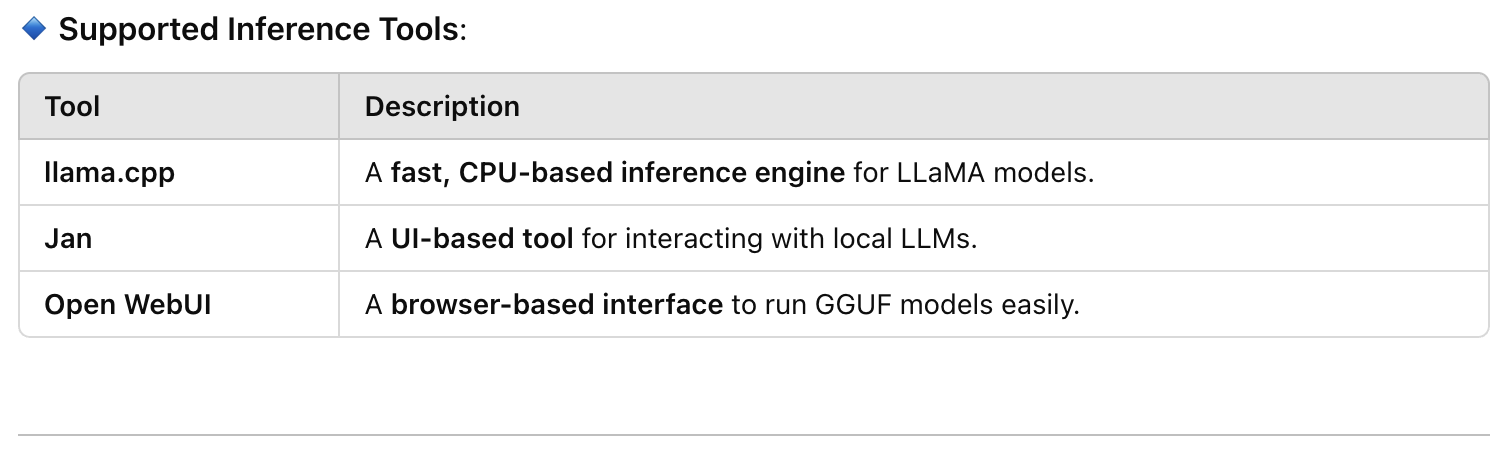

NB: **Where to Get Jan & Open WebUI**
- [Jan UI GitHub](https://github.com/janhq/jan)
- [Open WebUI GitHub](https://github.com/open-webui/open-webui)